# Project: Investigate a Dataset (The Movie Database (TMDb))
*This Database for movies contains thousands of movies and so much interesting information that includes the cast,genere, budget,revenue,release date and even more...

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

><ol> <strong> After Checking the database columns there are some questions suggested to be asked:</strong>
    <p></p>
    <li>What is highest and lowest profit movies in t?</li>
    <li>which director has successful movies based on revenue or average vote?</li>
    <li>which movie's genere  is more made through out years?</li>
    <li>what generes get more revenue?</li>
    <li>release year and genere?</li>
</ol>   



In [246]:
#I have almost imported each and every lib that i have read about i might not use all of them 
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [247]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')


In [248]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [249]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<strong style="background-color:Aquamarine;color:red;font-size:150%">Trying to see columns that have Null values </strong>


In [250]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [251]:
df.shape

(10866, 21)



# Data Cleaning (I will start with dropping Duplicates)

In [252]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.duplicated().sum()

1

In [253]:
df.drop_duplicates(inplace = True)

In [254]:
df.shape

(10865, 21)

<h1 style="background-color:Moccasin ;color:maroon">Lets Make A profit column based on budget and revenue</h1>

In [255]:
df['profit'] = df['revenue'] - df['budget']

In [256]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201


<h1 style="background-color:LightSeaGreen;">I will drop Columns that i won't use in my analysis</h1>
<h2 style="background-color:LightSeaGreen;">I will drop also rows that contian null</h2>

In [257]:
df_clean = df.drop(['release_date','imdb_id', 'production_companies','keywords','homepage','overview','tagline','budget_adj', 'revenue_adj','vote_count'], axis = 1, inplace = True)

In [258]:
df_clean = df.dropna(how='any',axis=0) 

In [259]:
df_clean.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015,1316249360


In [260]:
df_clean.set_index('id')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit
id,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1363528810
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,228436354
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,185238201
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1868178225
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,7.4,1966,0
20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,5.7,1966,0
39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,6.5,1966,0


<h1 style="background-color:DarkSlateGray ;color:white">---I figured out that i can't work with genres while ther are a string connected with pipes '|"</h1>

<h2 style="background-color:DarkSlateGray ;color:white">--so I will split the genres column and make a new dataframe containing the separted genres</h2>

In [261]:
genres_df = df['genres'].str.split("|", expand=True)

In [262]:
genres_df = genres_df.stack()

In [263]:
genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
0 0           Action
  1        Adventure
  2  Science Fiction
  3         Thriller
1 0           Action

<h3 style="background-color:DarkSlateGray ;color:white">now i can rename the column to be read easily and count the value of each genre</h3>

In [264]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
x=genres_df.genres_adj.value_counts()

In [265]:
x

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres_adj, dtype: int64

<h1 style="background-color:DarkTurquoise ;color:FireBrick">I thought i would make a pie chart to have a better view of different genres</h1>

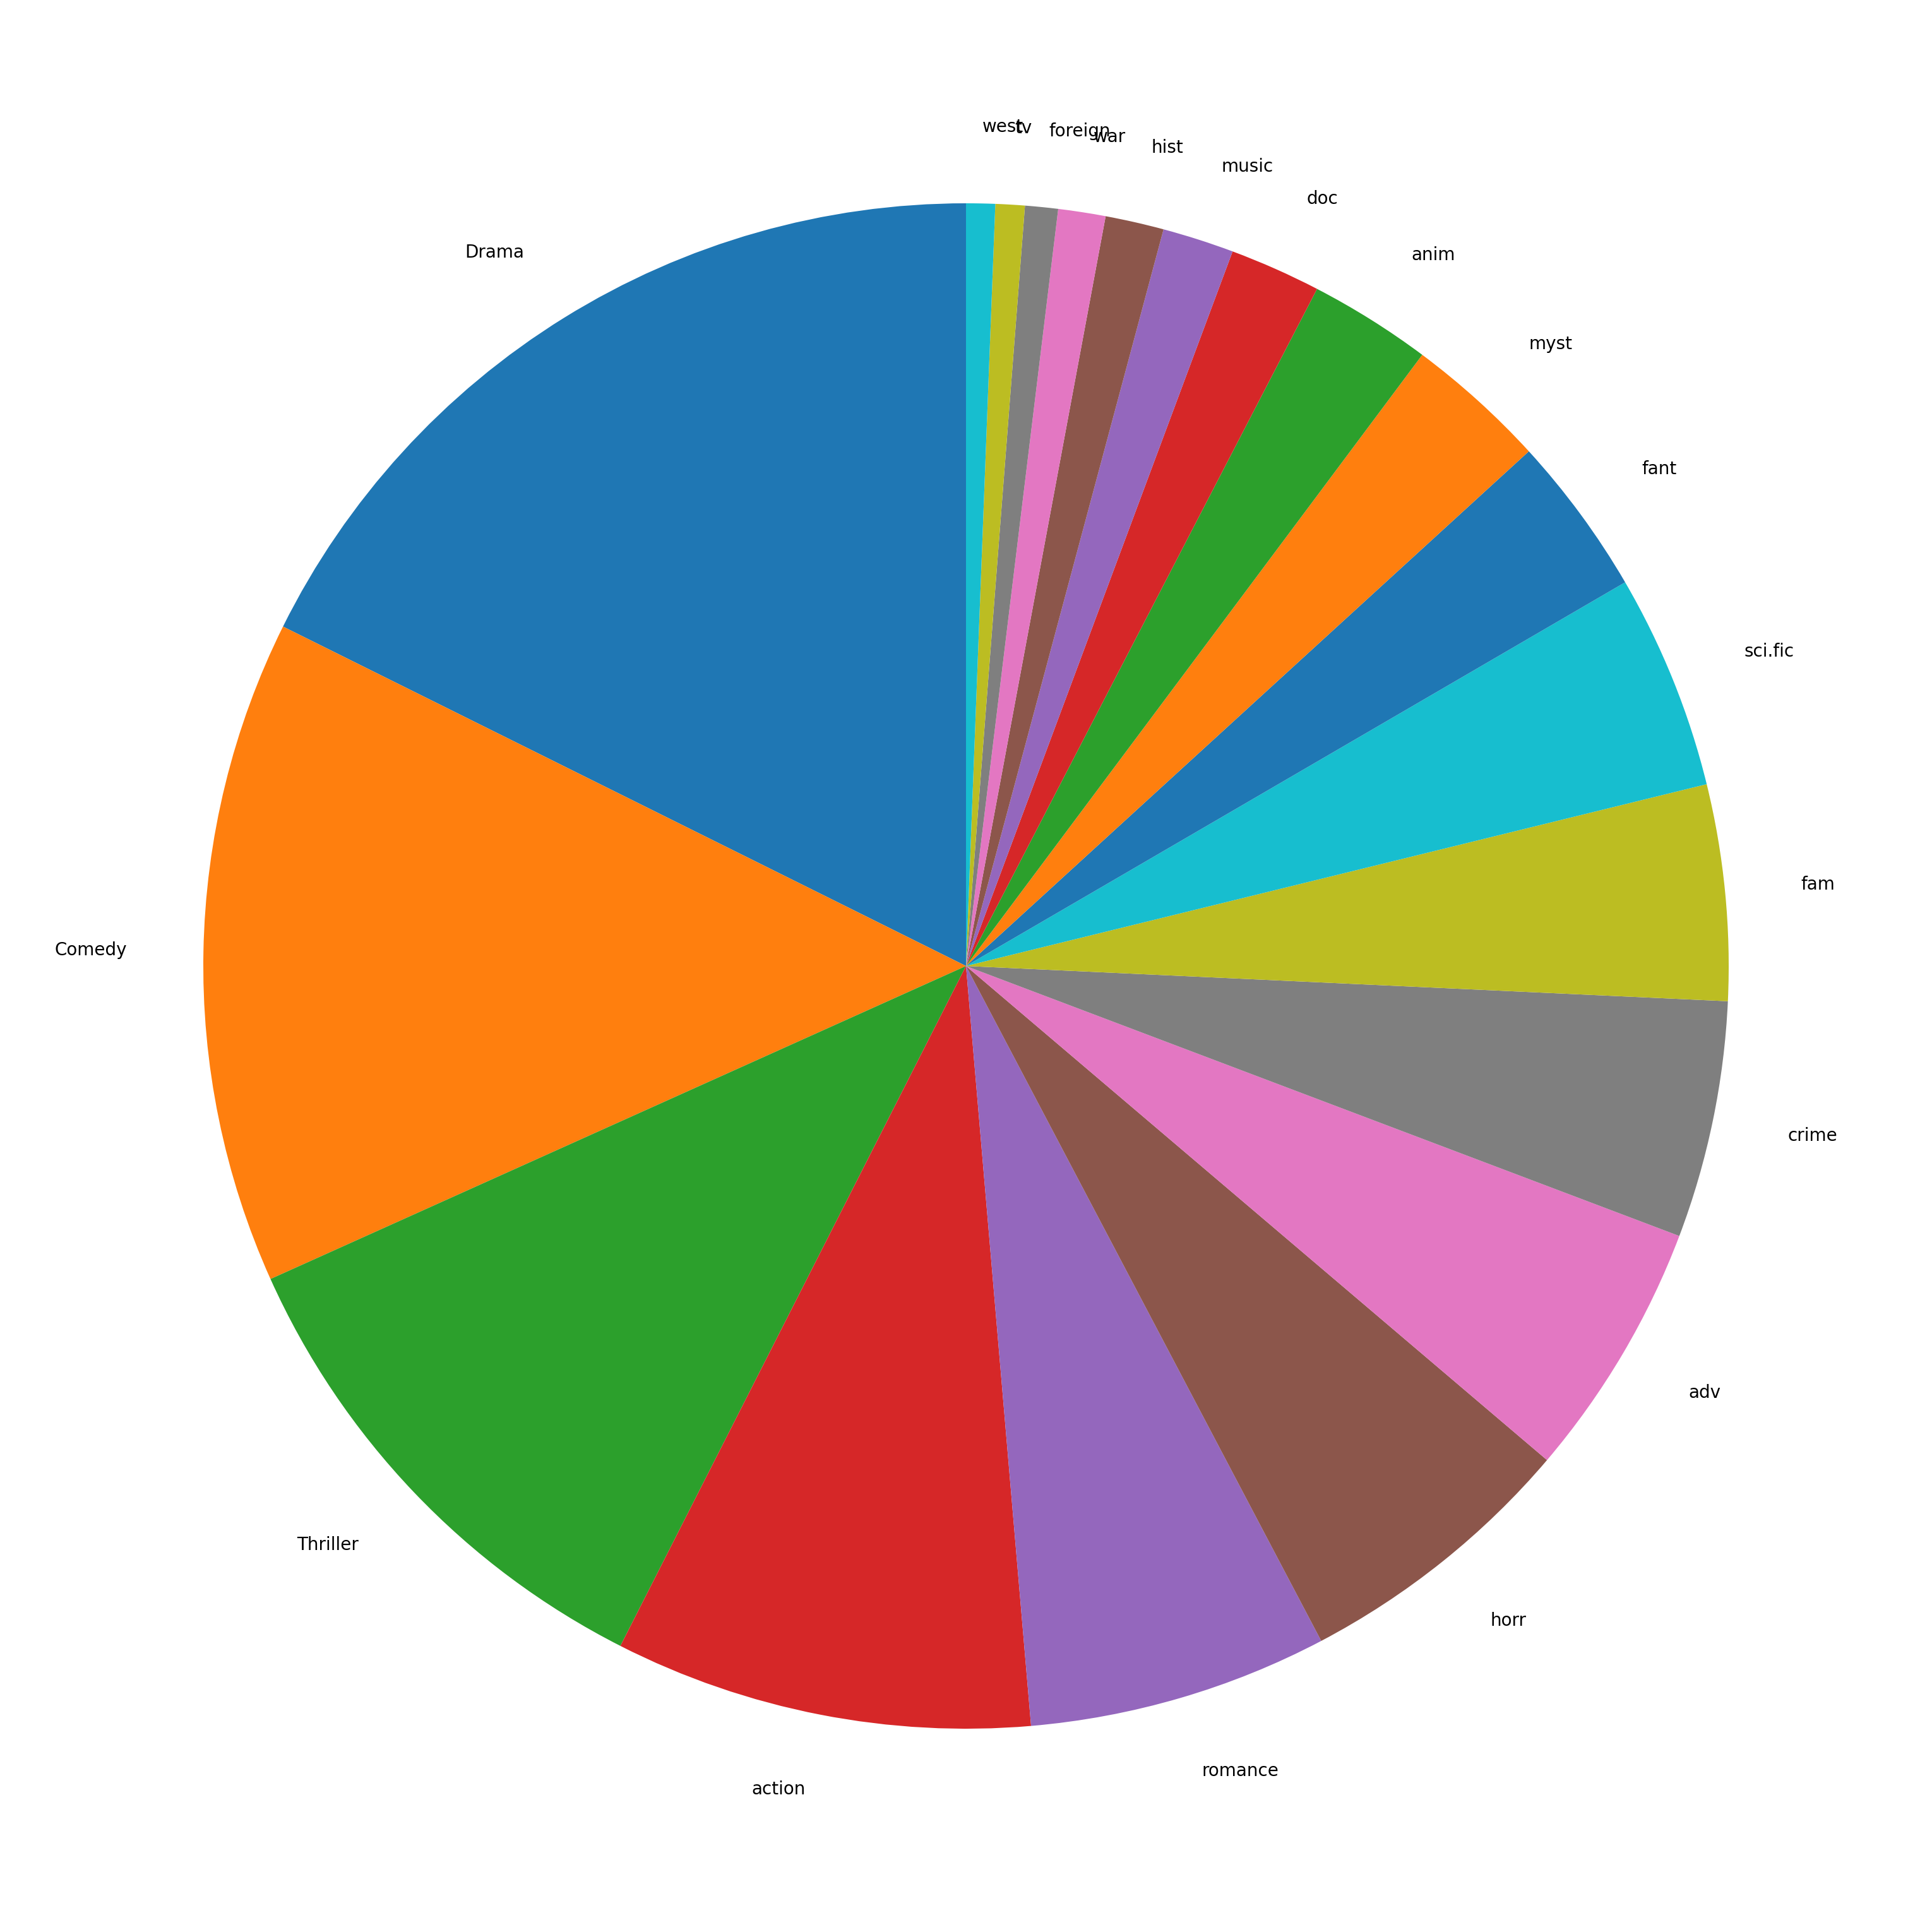

In [266]:
mylabels =['Drama','Comedy','Thriller','action','romance','horr','adv','crime','fam','sci.fic','fant','myst','anim','doc','music','hist','war','foreign','tv','west']

plt.figure(figsize=(20,20), dpi = 200)
plt.pie(x,labels = mylabels, startangle = 90)
plt.show()  

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (I want to check Highest and Lowest profit movies using simple statstics)

In [267]:

df_clean.loc[df_clean['profit'].idxmax()]

id                                                            19995
popularity                                                  9.43277
budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
vote_average                                                    7.1
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [268]:
df_clean.loc[df_clean['profit'].idxmin()]

id                                                            46528
popularity                                                  0.25054
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
vote_average                                                    6.4
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

## i want to select movies with profit +10 Million$


In [269]:
# Dataframe which has data of movies which made profit of more the 10M Dollars.
highp = df_clean[df_clean['profit'] >= 10000000]
# Reindexing the dataframe
highp.index = range(len(highp))
#showing the dataset
highp.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015,1316249360


<h1 style="background-color:LightSeaGreen;color:white">THen i will count movies genres accoridng to high profit</h1>


In [270]:
genres_count = pd.Series(highp['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              1115
Comedy             1043
Thriller            787
Action              776
Adventure           581
Romance             480
Crime               437
Family              369
Science Fiction     339
Fantasy             300
Horror              296
Mystery             217
Animation           163
Music                92
History              81
War                  77
Western              28
Documentary          18
Foreign               8
TV Movie              1
dtype: int64

<h1 style="background-color:LightSeaGreen;color:white">Then i will plot that into a figure to see what genres have highest level of profit</h1>


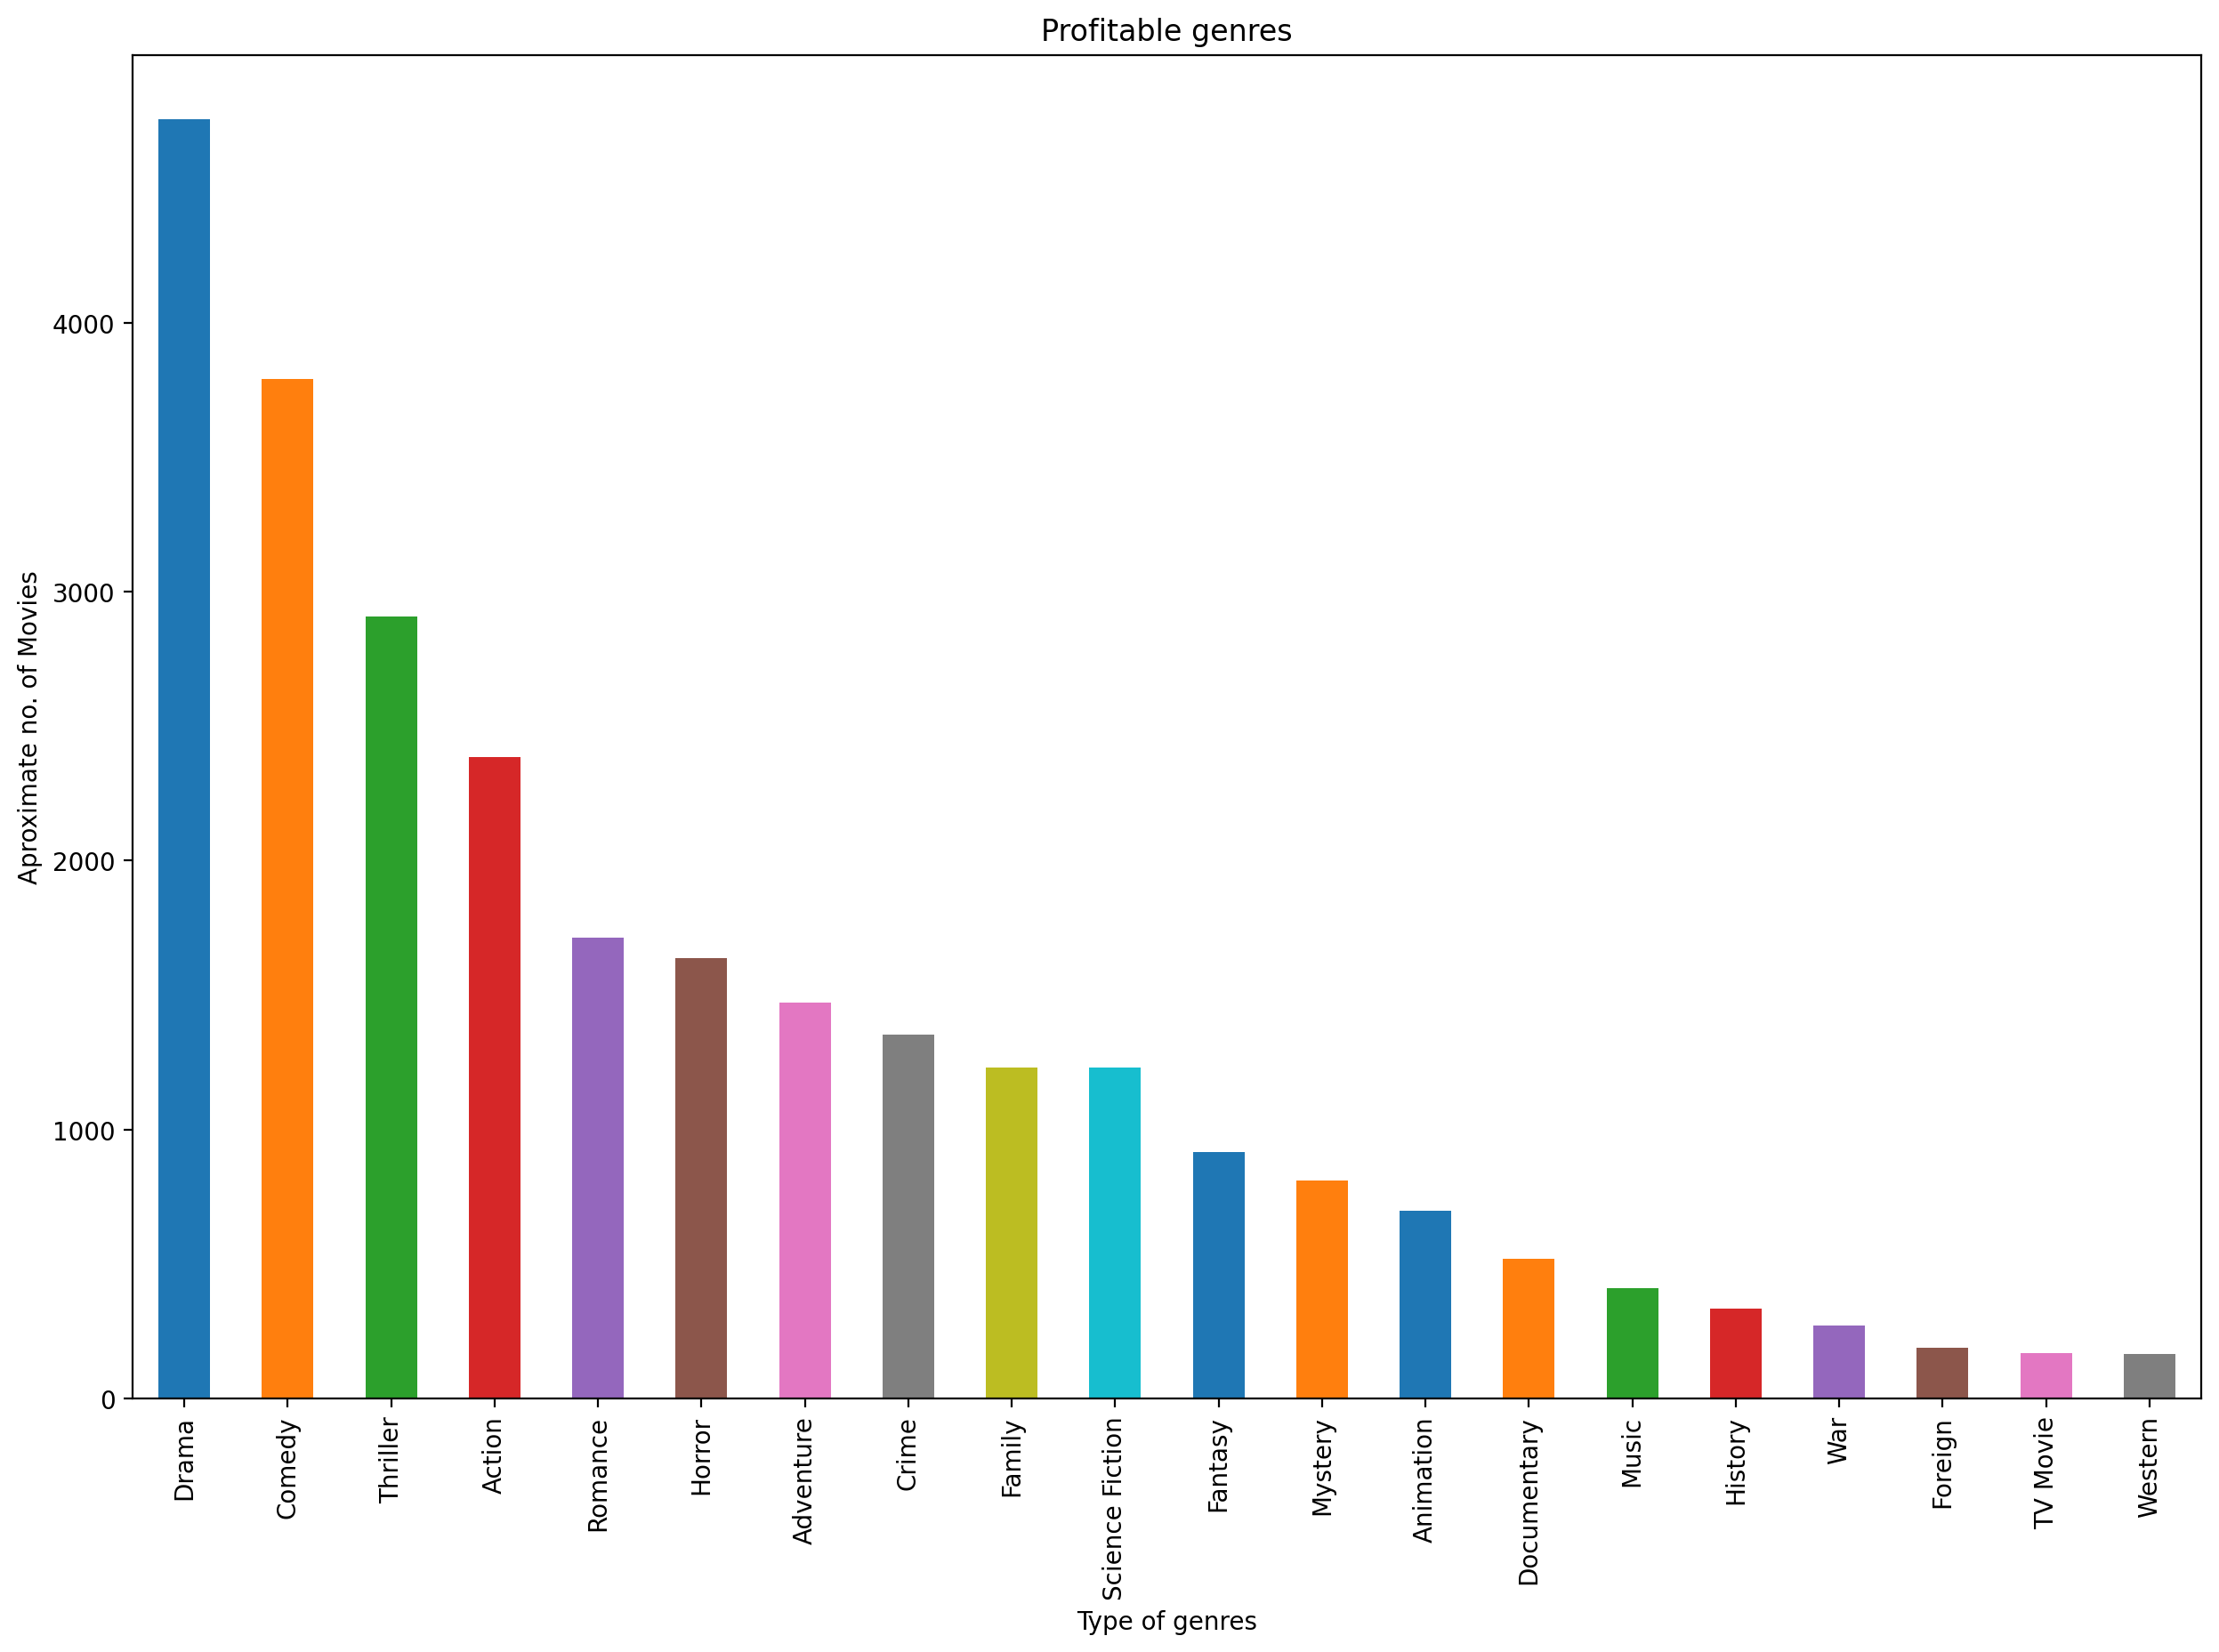

In [280]:
# Initialize the plot
plt.figure(figsize=(15,10), dpi = 200)
diagram = x.plot.bar(fontsize = 10, color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6', 'C7', 'C8', 'C9', 'C10','C11'])
# Set a title
diagram.set(title = 'Profitable genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Aproximate no. of Movies')
# Show the plot
plt.show()

<h1 style="background-color:LightSeaGreen;color:white">lets check if there is any correlation between budget and profit</h1>


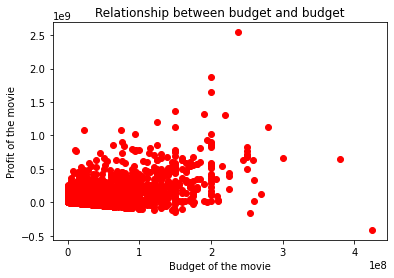

In [272]:
# x-axis
plt.xlabel('Budget of the movie')
# y-axis
plt.ylabel('Profit of the movie')
# Title of the histogram
plt.title('Relationship between budget and budget')
plt.scatter(df_clean['budget'], df_clean['profit'], alpha=1, color = 'red')
plt.show()

<h3 style="background-color:grey;color:red">what i can deduce from the scatter that a big budget movie doesn't always mean a big profit</h3>

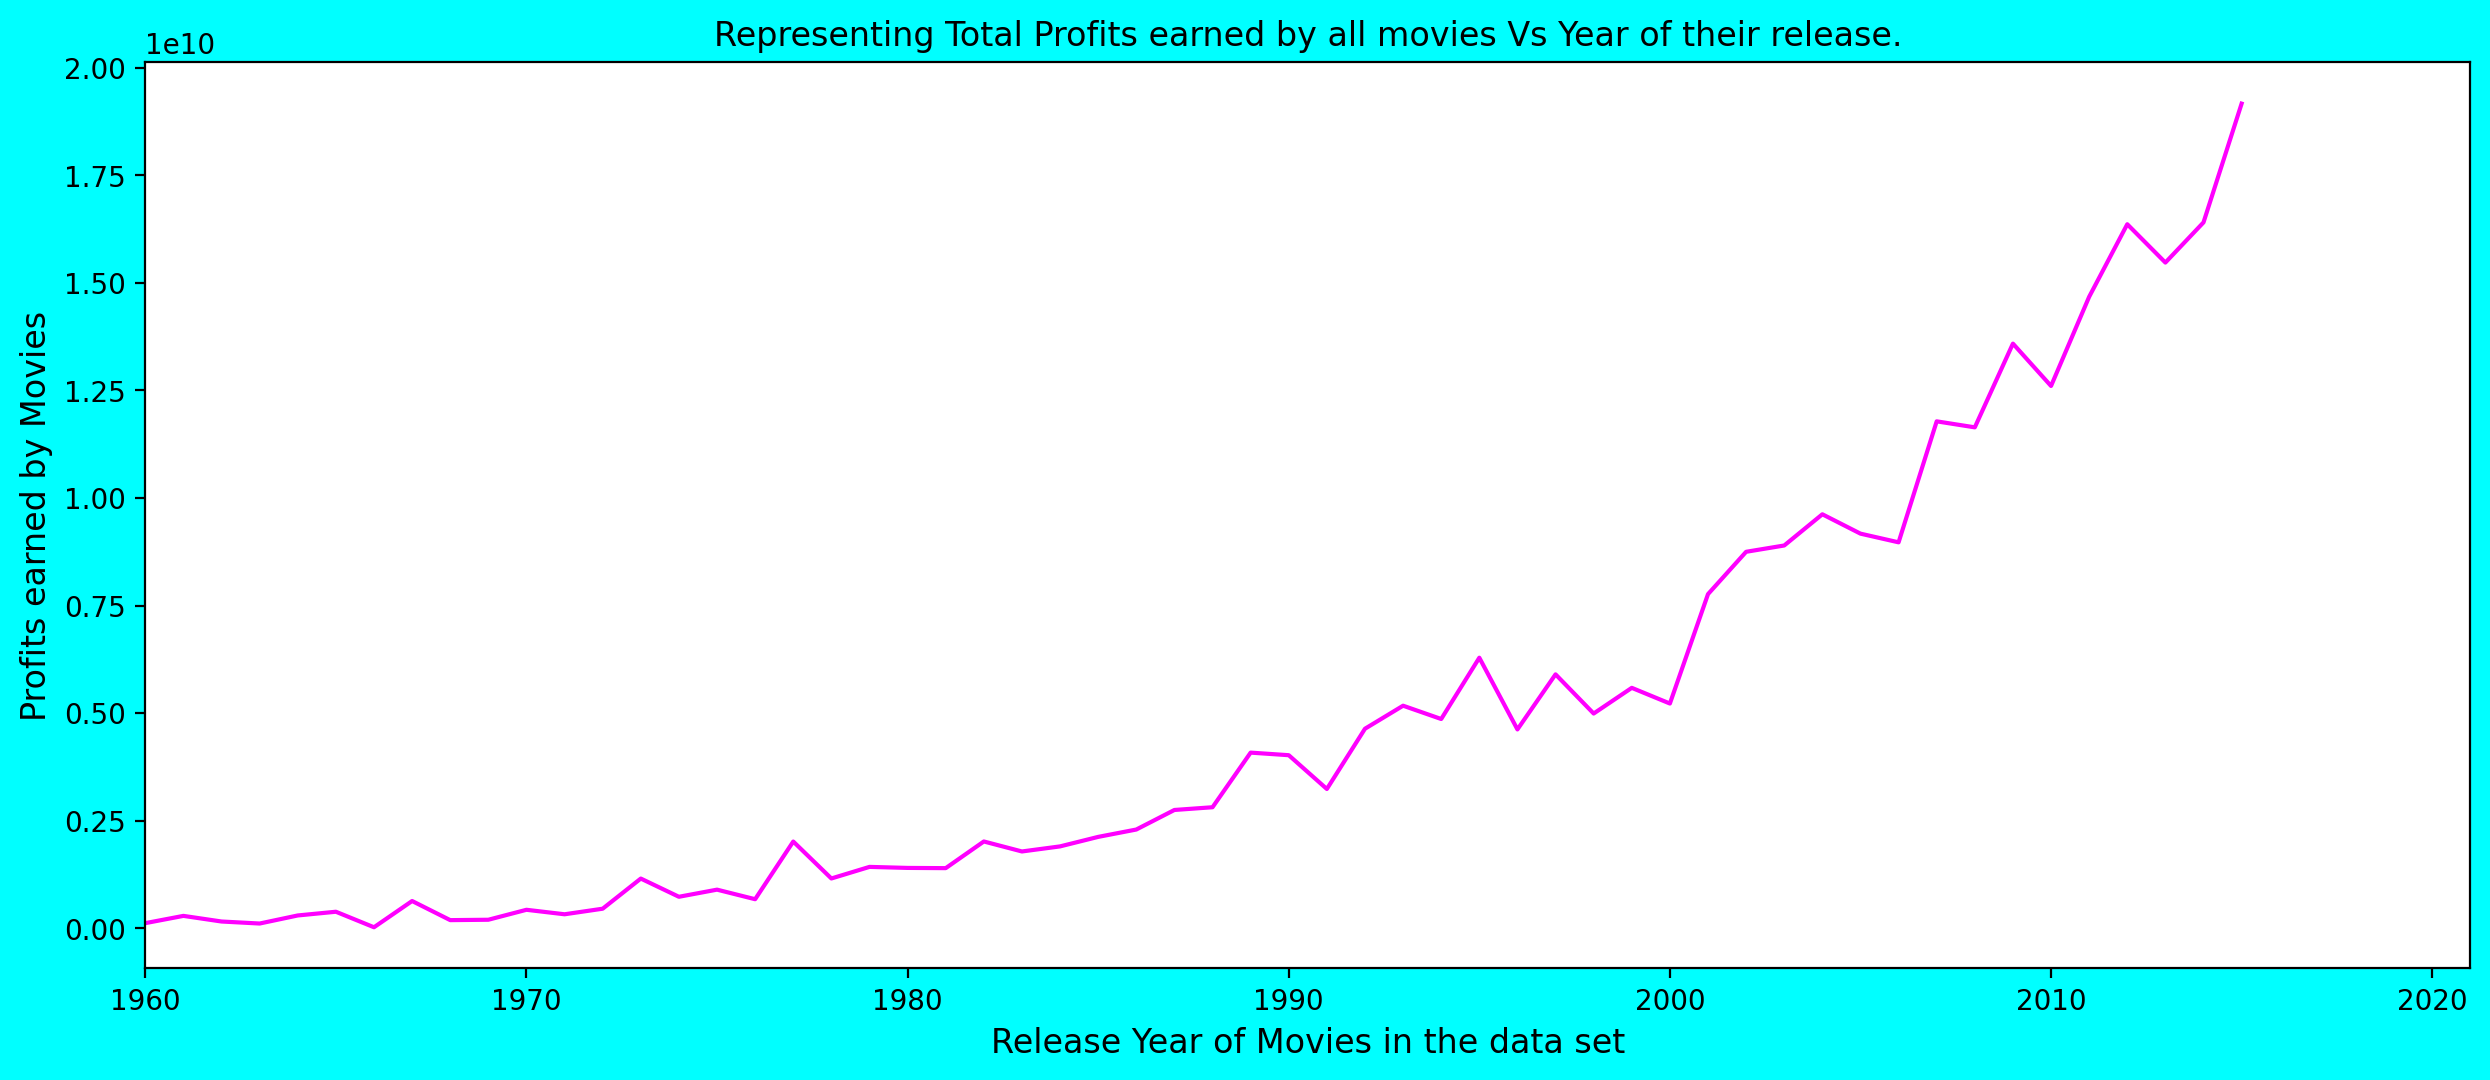

In [273]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df_clean.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(15,6), dpi = 200, facecolor = 'aqua')

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year, color='magenta')
plt.xlim([1960, 2021])

#displaying the line plot
plt.show()

In [276]:
df_gen_gen=genres_df.groupby('genres_adj').mean()
df_gen_gen=df_gen_gen.sort_values('vote_average')
df_gen_gen
fig= plt.figure(figsize=(20,20))
plt.bar(df_gen_gen.index,df_gen_gen['vote_average'], color = 'maroon',width = 0.9)
plt.xticks(rotation='90')
plt.title('Vote Average by Genre')
plt.ylabel('Vote Average')
plt.xlabel('genres')
plt.show()

DataError: No numeric types to aggregate

In [ ]:
df_gen_gen=df_clean.groupby('genres').mean()
df_gen_gen=df_gen_gen.sort_values('vote_average')
df_gen_gen
fig= plt.figure(figsize=(15,20))
plt.bar(df_gen_gen.index,df_gen_gen['vote_average'], color = 'maroon')
plt.xticks(rotation='90')
plt.title('Vote Average by Genre')
plt.ylabel('Vote Average')
plt.xlabel('genres')
plt.show()

### Research Question 2  (What is the average runtime of movies)

In [277]:
#Average runtime
#it shows that most movies run time over 1.5 hours
df_clean['runtime'].mean()

102.46882862734135

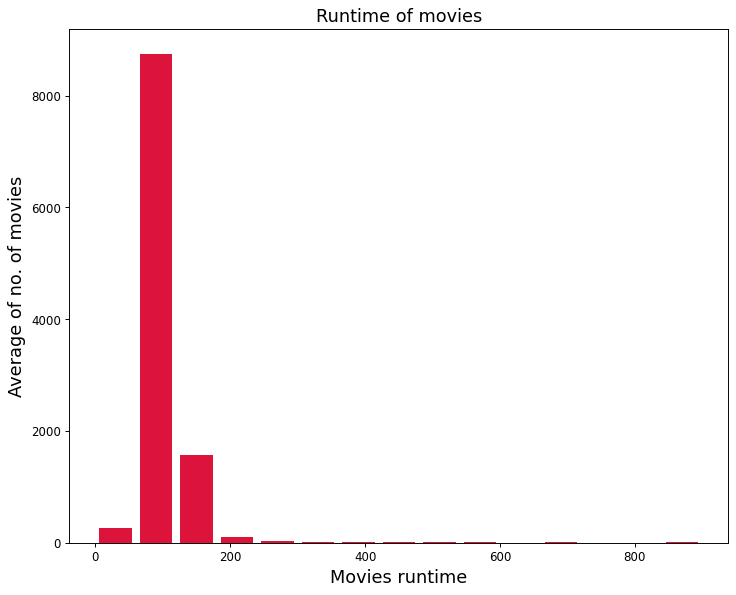

In [278]:
#we could plot the runtime average throughout the database to have more insights

plt.figure(figsize=(10,8), dpi = 85)
plt.xlabel('Movies runtime', fontsize = 15)
plt.ylabel('Average of no. of movies', fontsize=15)
plt.title('Runtime of movies', fontsize=15)
plt.hist(df_clean['runtime'], rwidth = 0.8, bins =15, color='Crimson')

plt.show()


<h2 style="background-color:LightSeaGreen;color:grey">BY checking the plot we can figure the following </h2>
<ul style="font-size:150% ; color:Crimson">
    <li> majority of the movies is almost hour and half</li>
    <li> next major runtime would bed almost 150 MINS  </li>
    <li> and lastly there are very few number of movies which is over 200 mins </li>    
</ul>


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'My_dataset_investgation.ipynb'])